<a href="https://colab.research.google.com/github/dartwinshu/dibimbing-marketing-analysis-and-segmentation/blob/main/Dibimbing%20-%20Marketing%20Analysis%20and%20Segmentation%20-%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment



In [392]:
# Meng-install library Python yang akan digunakan
!pip install openpyxl

# Mengimport library Python yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from datetime import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Marketing Analysis

### Data Inspection

In [393]:
# Mengimport data
df_marketing=pd.read_csv("attribution_data_market.csv")

In [394]:
# Mengetahui jenis dan jumlah data menggunakan metode info() dan describe()
df_marketing.info()
df_marketing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cookie            586737 non-null  object 
 1   time              586737 non-null  object 
 2   interaction       586737 non-null  object 
 3   conversion        586737 non-null  int64  
 4   conversion_value  586737 non-null  float64
 5   channel           586737 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 26.9+ MB


,conversion,conversion_value
count,586737.000000,586737.000000
mean,0.030063,0.187871
std,0.170760,1.084498
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,8.500000


In [395]:
# Melihat contoh sampel data secara acak
df_marketing.sample(10)

,cookie,time,interaction,conversion,conversion_value,channel
316175,EfDEiAFf900FnAi9AFFDCkAo9,2018-07-14T13:59:37Z,impression,0,0.0,Paid Search
376552,fAEFno0ECono9FFCfF79EE7nB,2018-07-30T12:33:58Z,impression,0,0.0,Instagram
440829,i07AFhf7AFfFBhB9hD9i9fkfi,2018-07-14T16:44:01Z,impression,0,0.0,Facebook
122671,9C3DAn9E0f9Ch9h700fnhBCA7,2018-07-18T10:46:26Z,impression,0,0.0,Instagram
512021,koi79D3Ei7kFo7fi0fk30309A,2018-07-29T09:21:12Z,impression,0,0.0,Paid Search
113103,93ikEf3kkfkiEFnk97CEED9i9,2018-07-28T22:03:45Z,impression,0,0.0,Online Video
84294,7B7EBEo9ioo97CFofkDAh0EkB,2018-07-07T18:46:06Z,impression,0,0.0,Instagram
345137,FCoADi97k9hfoEF0Annff330k,2018-07-16T14:44:31Z,impression,0,0.0,Instagram
76076,73F9BBCiDCA0AnD0AkECA3BDi,2018-07-14T19:48:55Z,impression,0,0.0,Instagram
342881,FBnF7oDiEBCECEnAF3k3kh7Ci,2018-07-10T19:38:54Z,impression,0,0.0,Online Video


Dari data df_marketing yang ditampilkan diketahui:

1. Data terdiri atas 6 kolom dan 586737 baris
2. Data numerical:

 - conversion
 - conversion_value
 - time (Seharusnya termasuk numerical, perlu dilakukan perubahan data)

3. Data categorical

 - cookie
 - interaction
 - channel

4. Tidak ada kolom yang memiliki missing values berdasarkan semua kolom memiliki non-null content sebanyak 586737 baris

5. Data kolom conversion memiliki nilai maksimal 1 dan nilai minimal 0, maka data kolom conversion kemungkinan bermakna apakah conversion terjadi atau tidak (1 = Ya, 0 = Tidak)

6. Data kolom conversion_value memiliki nilai maksimal 8 dan nilai minimal 0, maka data kolom conversion_value kemungkinan bermakna berapa conversions yang berhasil terjadi pada suatu interaksi

7. Data kolom time memiliki format yang tidak dapat dibaca oleh sistem sebagai numerical data, maka perlu dilakukan perubahan

8. Data masih belum ada data kolom day of week yang bisa dibuat untuk analisis marketing lebih lanjut

### Data Preparation

Setelah melakukan Data Inspection, maka dilakukan data preparation berupa:

1. Karena data kolom time memiliki format yang tidak dapat dibaca sebagai numerical data, maka perlu dilakukan perubahan agar dapat diolah
2. Karena data kolom day of week belum ada, maka dapat dibuat melalui data kolom time yang sudah diubah

In [396]:
# Meng-copy data untuk menghindari edit pada data primer langsung
df_marketing_copy = df_marketing.copy()

In [397]:
# Menampilkan data sebelum diubah
df_marketing_copy

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search
...,...,...,...,...,...,...
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:45Z,impression,0,0.0,Online Display
586733,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:54Z,impression,0,0.0,Online Display
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03T12:57:25Z,impression,0,0.0,Paid Search
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19T08:17:59Z,impression,0,0.0,Online Video


In [398]:
# Menghapus string huruf yang terdapat pada data kolom time
df_marketing_copy['time'] = df_marketing_copy['time'].str.replace('T', ' ')
df_marketing_copy['time'] = df_marketing_copy['time'].str.replace('Z', ' ')

# Menambahkan data kolom date
df_marketing_copy['date'] = df_marketing_copy['time'].str[:10:]

# Mengubah tipe data data kolom time menjadi tanggal dengan metode to_dateme()
df_marketing_copy['time'] = pd.to_datetime(df_marketing_copy['time'])
df_marketing_copy['date'] = pd.to_datetime(df_marketing_copy['date'])

In [399]:
# Menampilkan data setelah diubah
df_marketing_copy

,cookie,time,interaction,conversion,conversion_value,channel,date
0,00000FkCnDfDDf0iC97iC703B,2018-07-03 13:02:11,impression,0,0.0,Instagram,2018-07-03
1,00000FkCnDfDDf0iC97iC703B,2018-07-17 19:15:07,impression,0,0.0,Online Display,2018-07-17
2,00000FkCnDfDDf0iC97iC703B,2018-07-24 15:51:46,impression,0,0.0,Online Display,2018-07-24
3,00000FkCnDfDDf0iC97iC703B,2018-07-29 07:44:51,impression,0,0.0,Online Display,2018-07-29
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03 09:44:57,impression,0,0.0,Paid Search,2018-07-03
...,...,...,...,...,...,...,...
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12 23:50:45,impression,0,0.0,Online Display,2018-07-12
586733,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12 23:50:54,impression,0,0.0,Online Display,2018-07-12
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03 12:57:25,impression,0,0.0,Paid Search,2018-07-03
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19 08:17:59,impression,0,0.0,Online Video,2018-07-19


Dari baris terakhir hasil sebelumnya, dapat diketahui jumlah baris data kolom time masih sama seperti semula sebanyak 586737 baris dan tipe data data kolom berubah menjadi tanggal (datetime)

In [400]:
# Membuat data kolom dow sebagai kolom yang menunjukkan day of week berdasarkan data kolom time
# Mengkonversi nilai dayofweek dari time dengan menggunakan attribute dt.dayofweek
df_marketing_copy['dow'] = df_marketing_copy['date'].dt.dayofweek

# Menampilkan banyaknya masing-masing nilai dayofweek yang berhasil dibuat
df_marketing_copy['dow'].value_counts()

6    96832
0    95323
2    87179
1    84982
3    79519
5    75500
4    67402
Name: dow, dtype: int64

In [401]:
# Membuat dictionary weekday untuk keperluan mengkonversi nilai dayofweek menjadi nama dayofweek
weekday_dict={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

# Mengkonversi nilai dayofweek berdasarkan dictionary weekday
df_marketing_copy['dow'] = df_marketing_copy['dow'].map(weekday_dict)

# Menampilkan banyaknya masing-masing nama dayofweek yang berhasil dibuat
df_marketing_copy['dow'].value_counts()

Sun    96832
Mon    95323
Wed    87179
Tue    84982
Thu    79519
Sat    75500
Fri    67402
Name: dow, dtype: int64

In [402]:
# Menampilkan data df_marketing_copy setelah ditambahkan data kolom dow
df_marketing_copy

,cookie,time,interaction,conversion,conversion_value,channel,date,dow
0,00000FkCnDfDDf0iC97iC703B,2018-07-03 13:02:11,impression,0,0.0,Instagram,2018-07-03,Tue
1,00000FkCnDfDDf0iC97iC703B,2018-07-17 19:15:07,impression,0,0.0,Online Display,2018-07-17,Tue
2,00000FkCnDfDDf0iC97iC703B,2018-07-24 15:51:46,impression,0,0.0,Online Display,2018-07-24,Tue
3,00000FkCnDfDDf0iC97iC703B,2018-07-29 07:44:51,impression,0,0.0,Online Display,2018-07-29,Sun
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03 09:44:57,impression,0,0.0,Paid Search,2018-07-03,Tue
...,...,...,...,...,...,...,...,...
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12 23:50:45,impression,0,0.0,Online Display,2018-07-12,Thu
586733,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12 23:50:54,impression,0,0.0,Online Display,2018-07-12,Thu
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03 12:57:25,impression,0,0.0,Paid Search,2018-07-03,Tue
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19 08:17:59,impression,0,0.0,Online Video,2018-07-19,Thu


Dari data df_marketing_copy sebelumnya, dapat diketahui jumlah kolom berubah menjadi 8, karena adanya penambahan data kolom date dan dow

In [403]:
# Memasukkan data df_marketing copy ke data primer
df_marketing = df_marketing_copy

### Exploratory Data Analysis / Marketing Analysis

EDA / Marketing analysis dilakukan untuk mengetahui, memahami, dan mempelajari data yang sudah disiapkan untuk memperoleh informasi atau insight yang penting untuk marketing

#### Interaction Analysis by Marketing Channel

In [404]:
# Menghitung banyaknya interactions pada masing-masing marketing channel
channel_count = df_marketing['channel'].value_counts(sort=True,ascending=False)

# Menampilkan banyaknya interactions pada masing-masing marketing channel
channel_count

Facebook          175741
Paid Search       151440
Online Video      113302
Instagram          75201
Online Display     71053
Name: channel, dtype: int64

In [405]:
# Menampilkan rata-rata banyaknya interactions
channel_count.mean()

117347.4

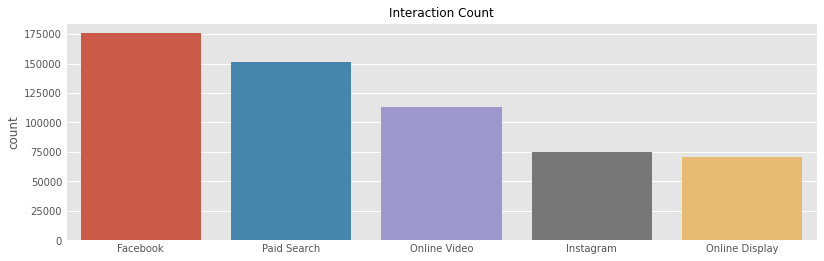

In [406]:
# Membuat visualisasi dari banyaknya interactions pada masing-masing marketing channel
plt.figure(figsize=(12,4))
ax=sns.countplot(df_marketing['channel'],order = channel_count.index)
plt.xlabel('')
plt.title('Interaction Count',fontsize=12);

Dari perhitungan dan visualisasi sebelumnya, dapat diketahui:
1. Marketing channel yang memiliki interactions terbanyak adalah Facebook, sebanyak 175741 interactions
2. Marketing channel yang memiliki interactions terdikit adalah online display, sebanyak 71053 interactions
3. Rata-rata interactions yang dimiliki adalah 117347.4 interactions

#### Daily Interaction Analysis by Marketing Channel

In [407]:
# Membuat pivot tabel interactions pada setiap tanggal untuk masing-masing marketing channel
daily_interaction_count = df_marketing.pivot_table(values = 'cookie', index = 'date', columns = 'channel', aggfunc=len)

# Menampilkan pivot tabel
daily_interaction_count.sample(10)

channel,Facebook,Instagram,Online Display,Online Video,Paid Search
date,,,,,
2018-07-09,4949,2113,2648,3656,5237
2018-07-22,5979,2561,2818,6697,3211
2018-07-14,5796,2596,2979,4330,6154
2018-07-01,5037,2107,2572,1649,3215
2018-07-21,5586,2467,2534,5149,4798
2018-07-29,7496,3175,2837,3162,3936
2018-07-24,5318,2252,2452,2571,2811
2018-07-08,5409,2277,7,2867,6627
2018-07-25,5007,2084,2434,5141,3072


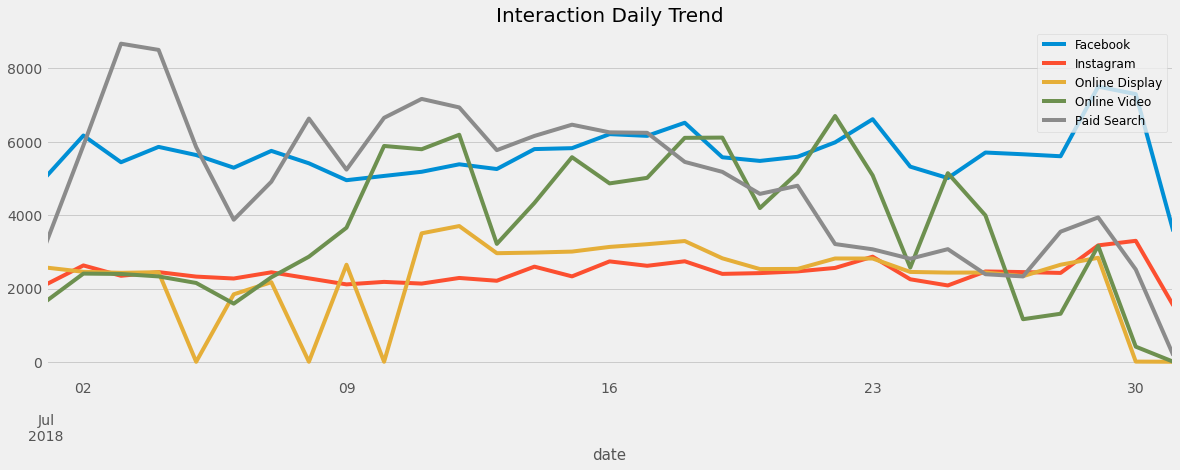

In [408]:
# Menampilkan visualisasi dari pivot tabel sebelumnya
plt.style.use('fivethirtyeight')
daily_interaction_count.plot(kind = 'line',figsize=(18,6))
plt.xlabel("date",size=15);
plt.title("Interaction Daily Trend",size = 20)
plt.legend(loc = 'upper right',fontsize = 12);

Dari hasil pivot tabel dan visualisasi sebelumnya, dapat diketahui:
1. Online Video dan Online Display memiliki jumlah interactions yang fluktuatif terhadap tanggal
2. Instagram memiliki jumlah interactions yang stabil
3. Facebook memiliki kenaikan jumlah interactions yang terjadi pada akhir bulan
4. Paid Search memiliki kenaikan jumlah interactions yang terjadi pada awal bulan
5. Rata-rata jumlah interactions yang paling tinggi dimiliki oleh Facebook dan Paid Search
6. Rata-rata jumlah interactions yang terendah dimiliiki oleh Instagram dan Online Display

#### Conversion Rate Analysis

In [409]:
# Menampilkan banyaknya interactions
print('Total Interactions: {}'.format(df_marketing['cookie'].nunique()))

# Menampilkan banyaknya interactions yang berhasil terjadi conversions
print('Interactions yang Berhasil Dikonversi: {}'.format(df_marketing.loc[df_marketing['conversion']==1,'cookie'].nunique()))

# Menampilkan conversion rate
print('Conversion Rate: {}'.format(df_marketing.loc[df_marketing['conversion']==1,'cookie'].nunique()/df_marketing['cookie'].nunique()))

Total Interactions: 240108
Interactions yang Berhasil Dikonversi: 17639
Conversion Rate: 0.07346277508454528


#### Conversion Rate Analysis by Marketing Channel

In [410]:
# Menghitung banyaknya data conversion value yang berhasil terjadi conversion
conversions = df_marketing.groupby('channel')['conversion_value'].sum()

# Menghitung banyaknya data conversion value
interactions = df_marketing.groupby('channel')['conversion_value'].count()

# Membuat tabel yang menampilkan conversion rate masing-masing marketing channel
df_conversion = pd.concat([conversions, interactions],axis=1)
df_conversion.columns=['conversions','interactions']
df_conversion['conversion_rate'] = df_conversion['conversions']/df_conversion['interactions']

# Menampilkan tabel conversion rate masing-masing marketing channel
df_conversion

,conversions,interactions,conversion_rate
channel,,,
Facebook,33143.5,175741,0.188593
Instagram,14039.5,75201,0.186693
Online Display,13298.5,71053,0.187163
Online Video,21418.0,113302,0.189035
Paid Search,28331.5,151440,0.187081


Dari tabel sebelumnya, dapat diketahui:
1. Online Video memiliki conversion rate tertinggi, sebesar 0.1890
2. Instagram memiliki conversion rate terendah, sebesar 0.1867
3. Perbedaan conversion rate antara masing-masing marketing channel tidak berbeda jauh
4. Meskipun interaction paling banyak terjadi pada Facebook, tetapi conversion rate Facebook adalah kedua yang tertinggi
5. Meskipun interaction paling sedikit terjadi pada Online Display, tetapi conversion rate Online Display adalah ketiga yang tertinggi
6. Meskipun perbedaan conversion rate antara masing-masing marketing channel tidak berbeda jauh, tetapi jumlah interaction dan biaya setiap interaction pada marketing channel yang berbeda menjadi faktor yang perlu diperhatikan

#### Daily Conversion Rate Analysis by Marketing Channel

In [411]:
# Membuat fungsi untuk menghitung conversion rate
def conversion_rate(df, column_names):
    
    # Menghitung banyaknya conversion berdasarkan conversion = 1
    column_conv = df[df['conversion'] == 1.0].groupby(column_names)['cookie'].nunique()

    # Menghitung banyaknya interaction
    column_total = df.groupby(column_names)['cookie'].nunique()  
    
    # Menghitung conversion rate dari hasil pembagian banyaknya conversion dan banyaknya interaction
    conversion_rate = round(column_conv/column_total,2)
    
    # Mengisi missing value dengan 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [412]:
# Membuat fungsi untuk mem-plot data
def plotting_conv(df,kind):
    for column in df.columns:
        plt.style.use('ggplot')
        df[column].plot(kind=kind,figsize=(20,5))
        
        plt.title(column + ' conversion rate', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.grid(False)
        plt.show()
        plt.clf();

In [413]:
# Menghitung daily conversion rate by marketing channel dengan fungsi conversion_rate()
df_channel_conversion = pd.DataFrame(conversion_rate(df_marketing,['date','channel']).unstack(level=1))

# Menampilkan daily conversion rate by marketing channel dengan meode sample()
df_channel_conversion.sample(10)

channel,Facebook,Instagram,Online Display,Online Video,Paid Search
date,,,,,
2018-07-31,0.03,0.04,0.00,0.00,0.04
2018-07-18,0.03,0.03,0.04,0.05,0.04
2018-07-08,0.04,0.03,0.00,0.04,0.04
2018-07-14,0.04,0.04,0.03,0.05,0.04
2018-07-06,0.04,0.03,0.03,0.04,0.04
2018-07-02,0.03,0.04,0.03,0.04,0.04
2018-07-12,0.04,0.03,0.04,0.05,0.04
2018-07-23,0.04,0.03,0.04,0.04,0.03
2018-07-24,0.04,0.03,0.03,0.04,0.03


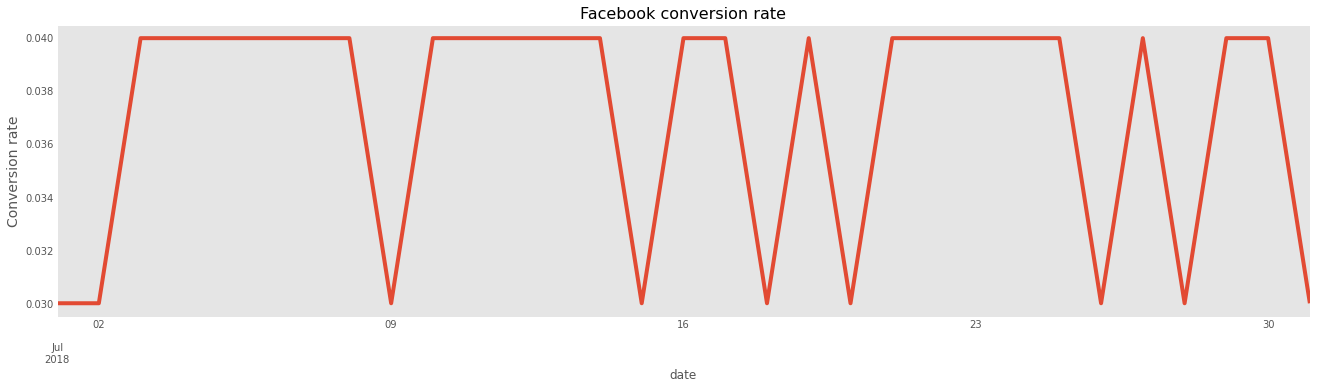

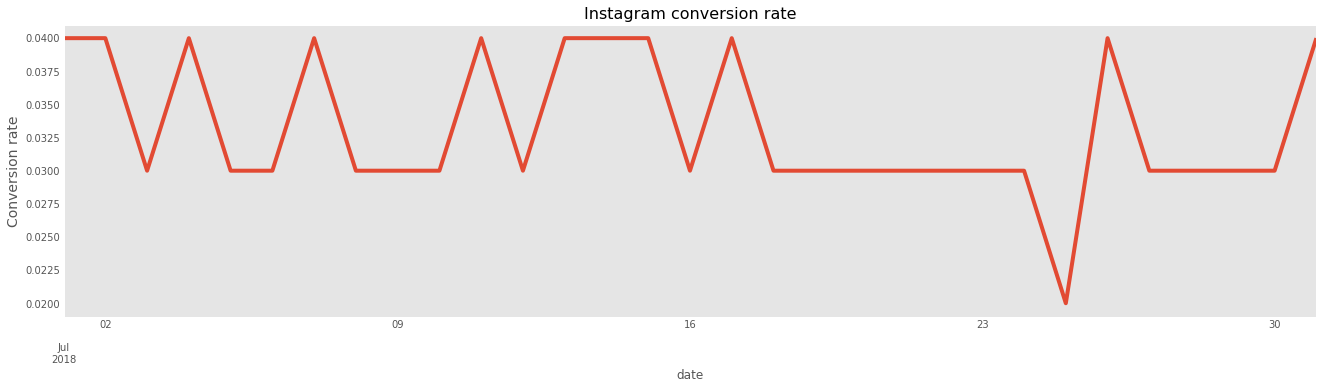

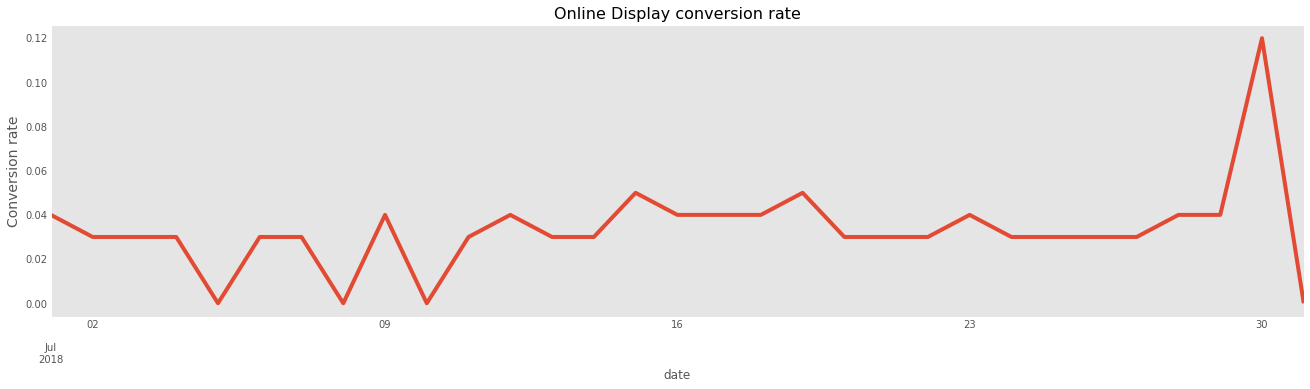

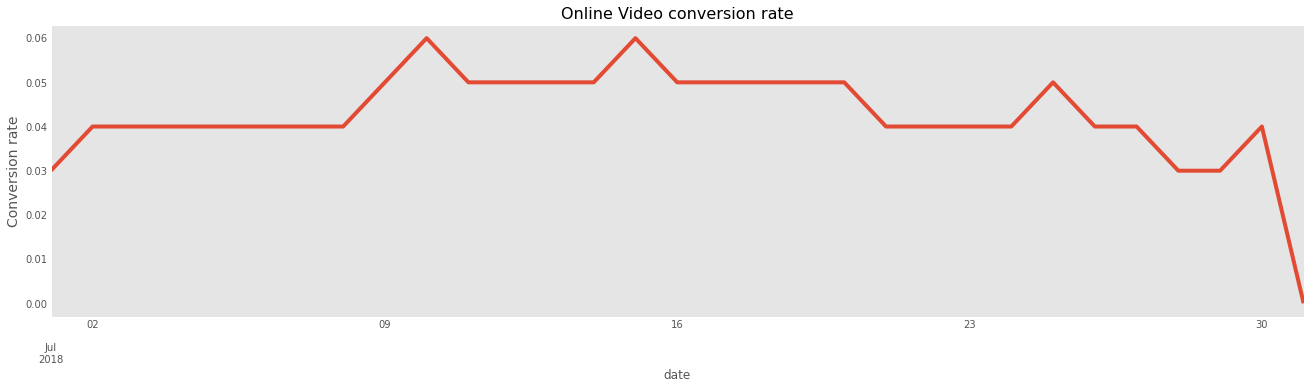

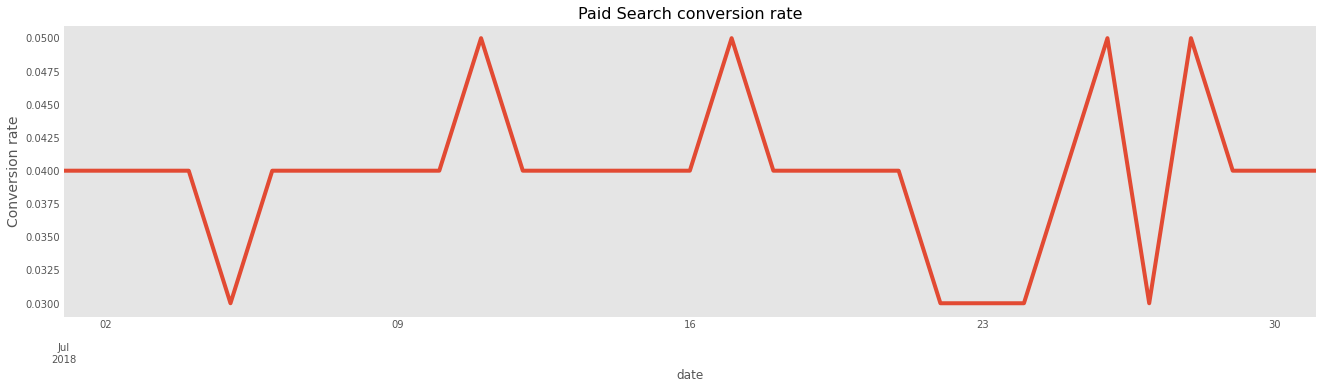

<Figure size 432x288 with 0 Axes>

In [414]:
# Membuat visualisasi daily conversion rate by marketing channel dengan menggunakan fungsi plotting_conv()
plotting_conv(df_channel_conversion,"line");

Dari hasil perhitungan dan visualisasi sebelumnya, dapat diketahui:
1. Conversion rate pada masing-masing marketing channel sangat fluktuatif
2. Online Display memiliki peak conversion rate tertinggi pada akhir bulan dan menurun
3. Online Video memiliki peak conversion rate tertinggi pada tengah bulan dan menurun

### Day of Week Conversion Rate Analysis

In [415]:
# Mengubah data kolom dow menjadi nilai day of week supaya dapat di-sort
df_marketing['dow'] = df_marketing['time'].dt.dayofweek

# Menghitung day of week conversion rate by marketing channel dengan menggunakan fungsi conversion_ratye()
df_dow_conversion = pd.DataFrame(conversion_rate(df_marketing,['dow','channel']).unstack(level=1))

# Menampilkan hasil perhitungan day of week conversion rate by marketing channel
df_dow_conversion

channel,Facebook,Instagram,Online Display,Online Video,Paid Search
dow,,,,,
0,0.04,0.03,0.04,0.05,0.04
1,0.04,0.03,0.04,0.06,0.04
2,0.04,0.03,0.04,0.06,0.04
3,0.04,0.03,0.04,0.05,0.04
4,0.04,0.04,0.04,0.05,0.04
5,0.04,0.04,0.03,0.05,0.04
6,0.04,0.03,0.04,0.05,0.04


In [416]:
# Membuat dictionary day of week
map_dict = {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu', 4.0: 'Fri',5.0: 'Sat',6.0: 'Sun'}

# Membuat data kolom baru day yang berisikan nama day of week dengan menggunakan dictionary
df_dow_conversion['day'] = df_dow_conversion.index.map(map_dict)

# Menampilkan perubahan data df_dow_conversion
df_dow_conversion

channel,Facebook,Instagram,Online Display,Online Video,Paid Search,day
dow,,,,,,
0,0.04,0.03,0.04,0.05,0.04,Mon
1,0.04,0.03,0.04,0.06,0.04,Tue
2,0.04,0.03,0.04,0.06,0.04,Wed
3,0.04,0.03,0.04,0.05,0.04,Thu
4,0.04,0.04,0.04,0.05,0.04,Fri
5,0.04,0.04,0.03,0.05,0.04,Sat
6,0.04,0.03,0.04,0.05,0.04,Sun


In [417]:
# Menjadikan data kolom day sebagai index
df_dow_conversion.set_index(df_dow_conversion['day'],inplace=True)

# Men-drop data kolom day
df_dow_conversion.drop(columns='day',inplace=True)

# Menampilkan hasil perubahan data df_dow_conversion
df_dow_conversion

channel,Facebook,Instagram,Online Display,Online Video,Paid Search
day,,,,,
Mon,0.04,0.03,0.04,0.05,0.04
Tue,0.04,0.03,0.04,0.06,0.04
Wed,0.04,0.03,0.04,0.06,0.04
Thu,0.04,0.03,0.04,0.05,0.04
Fri,0.04,0.04,0.04,0.05,0.04
Sat,0.04,0.04,0.03,0.05,0.04
Sun,0.04,0.03,0.04,0.05,0.04


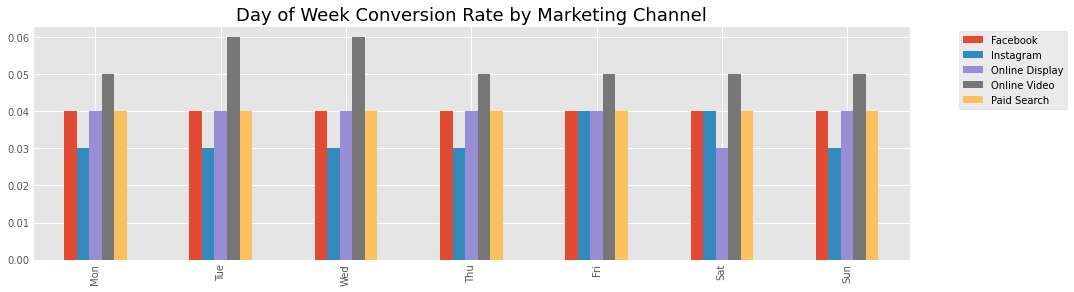

In [418]:
# Menampilkan visualisasi barchart data df_dow_conversion
df_dow_conversion.plot(kind="bar",figsize=(14,4))
plt.title('Day of Week Conversion Rate by Marketing Channel',fontsize=18)
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

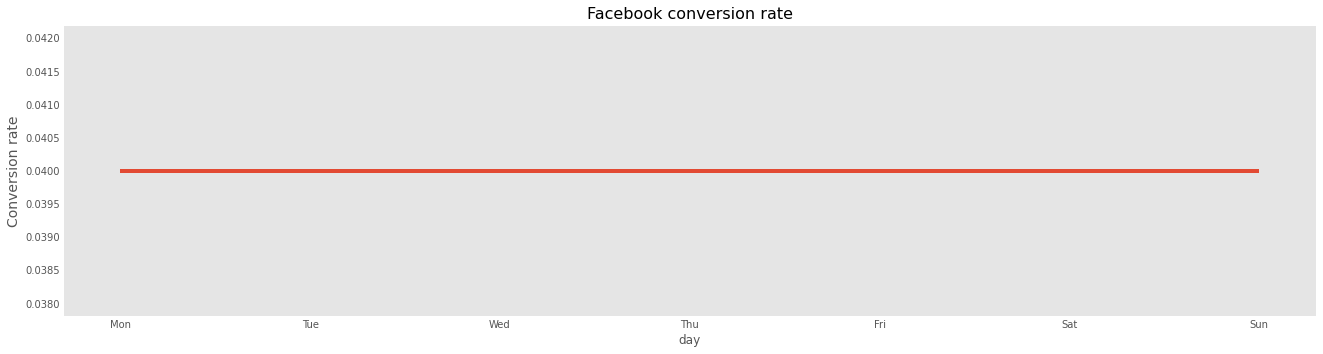

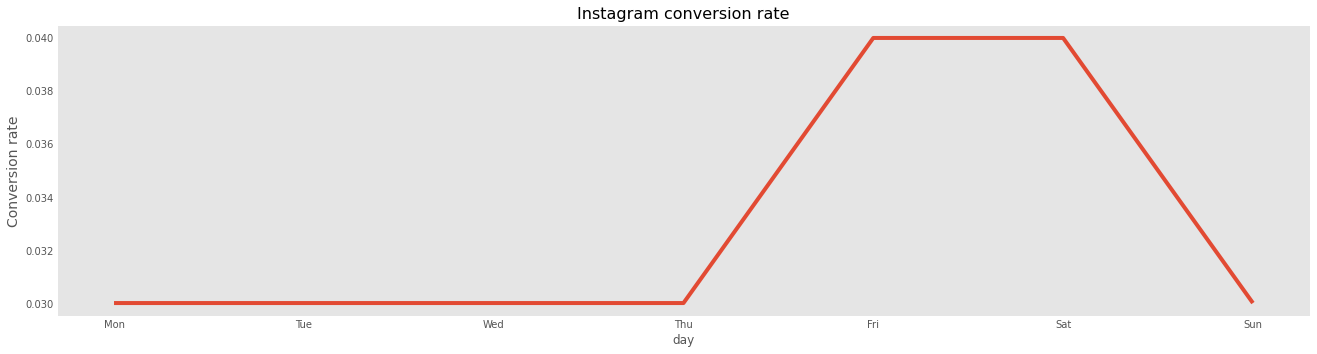

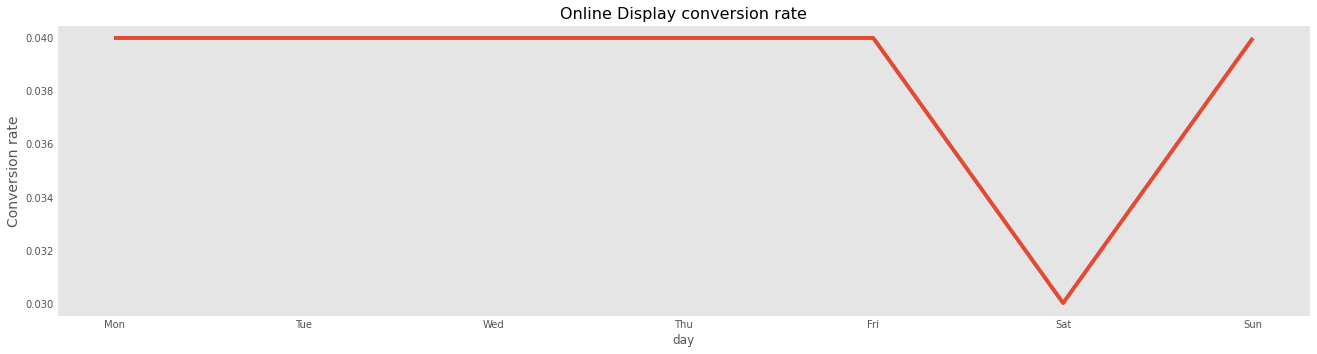

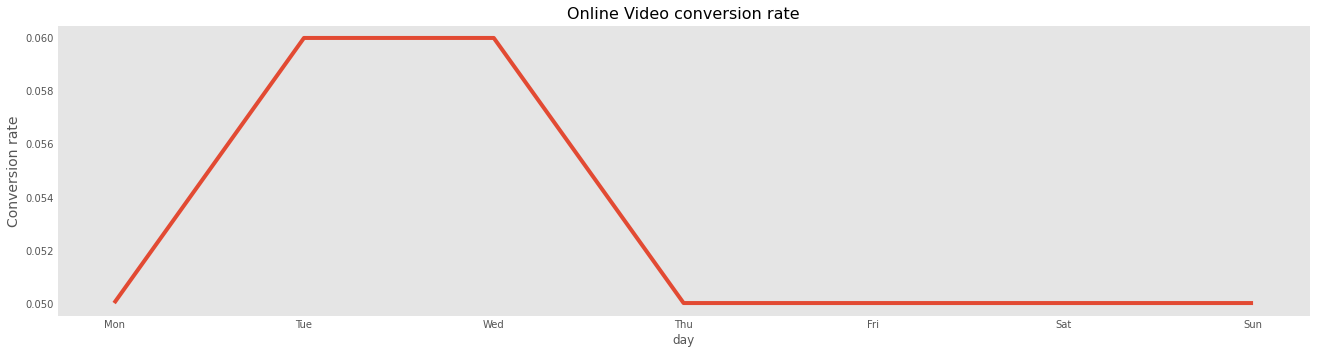

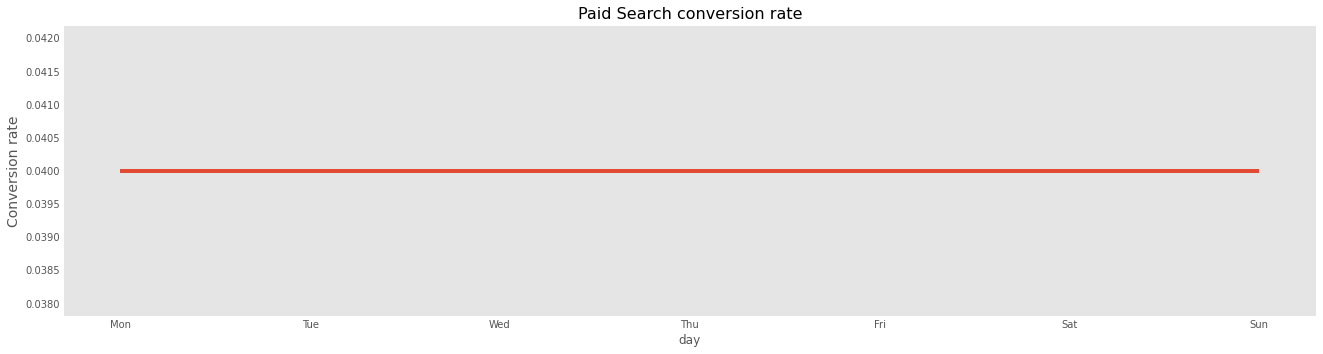

<Figure size 432x288 with 0 Axes>

In [419]:
# Menampilkan visualisasi linechart data df_dow_conversion dengan fungsin plotting_conv()
plotting_conv(df_dow_conversion,"line");

Dari hasil perhitungan dan visualisasi sebelumnya, dapat diketahui:
1. Tidak ada perubahan signifikan day of week conversion rate pada masing-masing marketing channel
2. Online Video memiliki rata-rata day of week conversion rate yang tertinggi
3. Instagram memiliki rata-rata day of week conversion rate yang terendah
4. Peak rata-rata day of week conversion rate masing-masing marketing channel tertinggi adalah hari Selasa, Rabu, dan Jumat

### Kesimpulan

Dari seluruh marketing analysis yang dilakukan sebelumnya, diperoleh kesimpulan:
1. Masing-masing marketing channel memiliki conversion rate yang tidak berbeda jauh, tetapi perlu diperhatikan untuk jumlah interactions yang disediakan pada masing-masing marketing channel sehingga menghemat biaya
2. Interactions terbanyak pada awal bulan terjadi pada Paid Search dan pada akhir bulan terjadi pada Facebook
3. Masing-masing marketing channel memiliki day of week conversion rate yang tidak berbeda jauh, peak rata-rata day of week conversion rate adalah hari Selasa, Rabu, dan Jumat


## 2. Segmentation：RFM

### Data Inspection

In [420]:
# Mengimport data
df_segmentation = pd.read_excel('Online Retail - Customer Segmentation.xlsx', engine = 'openpyxl')

In [421]:
# Mengetahui jenis dan jumlah data menggunakan metode info() dan describe()
df_segmentation.info()
df_segmentation.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [422]:
#Melihat contoh sampel data secara acak
df_segmentation.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
69361,541969,21688,SILVER PLATE CANDLE BOWL SMALL,2,2011-01-24 13:46:00,5.79,NaN,United Kingdom
500128,578719,23218,LAUREL STAR ANTIQUE GOLD,2,2011-11-25 11:25:00,1.25,17348.0,United Kingdom
71090,542109,22355,CHARLOTTE BAG SUKI DESIGN,90,2011-01-25 13:44:00,2.46,NaN,United Kingdom
182168,552520,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,1,2011-05-09 16:34:00,4.13,NaN,United Kingdom
297107,562934,15056BL,EDWARDIAN PARASOL BLACK,1,2011-08-10 16:56:00,12.46,NaN,United Kingdom
54744,540976,22922,FRIDGE MAGNETS US DINER ASSORTED,12,2011-01-12 15:00:00,0.85,12652.0,France
12353,537375,18097C,WHITE TALL PORCELAIN T-LIGHT HOLDER,4,2010-12-06 12:55:00,2.55,17019.0,United Kingdom
56824,541115,21787,RAIN PONCHO RETROSPOT,24,2011-01-13 15:34:00,0.85,12578.0,Italy
393350,570821,23126,FELTCRAFT GIRL AMELIE KIT,12,2011-10-12 12:51:00,4.15,17173.0,United Kingdom
506639,579147,23270,SET OF 2 CERAMIC PAINTED HEARTS,2,2011-11-28 13:20:00,1.45,13263.0,United Kingdom


Dari data df_segmentation yang ditampilkan diketahui:

1. Data terdiri atas 8 kolom dan 541909 baris
2. Data numerical:

 - Quantity
 - InvoiceDate
 - UnitPrice

3. Data categorical

 - InvoiceNo
 - StockCode
 - Description
 - CustomerID (Seharusnya tidak termasuk numerical, karena berfungsi sebagai kode unik untuk membedakan customer)
 - Country

4. Data kolom Description dan CustomerID terdapat missing values, karena terdapat null content di beberapa baris

5. Data kolom Quanity memiliki nilai minimal negative, kemungkinan merupakan data pemulangan produk oleh customer ke perusahaan

6. Data kolom UnitPrice memiliki nilai negative, kemungkinan merupakan data transaksi refund oleh perusahaan ke customer, karena terjadi pemulangan produk

7. Data masih belum ada kolom TotalPrice yang diperlukan sebagai monetary_value sehinga perlu dihitung

### Data Preparation

Setelah melakukan Data Inspection, maka dilakukan data preparation berupa:

1. Karena terdapat data missing values, yaitu data kolom Description dan Customer ID, maka perlu dilaporkan kepada user / pihak ketiga yang bertanggungjawab terhadap data tsb. sehingga hal tsb dapat diperbaiki dan kedepannya dapat dihindari. Jika kemudian mendapatkan instruksi penanganan terhadap data ybh, maka baru dilakukan tindak lebih lanjut

2. Karena belum terdapat data kolom TotalPrice, yang kemudian diperlukan untuk RFM Segmentation, maka perlu dibuat kolom baru dan diisi dengan perkalian data UnitPrice dan Quantity

In [423]:
# Meng-copy data untuk menghindari edit pada data primer langsung
df_segmentation_copy = df_segmentation.copy()

In [424]:
# Karena data masih belum terdapat kolom TotalPrice, maka
## Membuat kolom baru TotalPrice
TotalPrice = []

## Menghitung nilai TotalPrice dari perkalian Quanity dan UnitPrice dengan looping
for Quantity, UnitPrice in zip(df_segmentation_copy['Quantity'], df_segmentation_copy['UnitPrice']):
  TotalPrice.append(Quantity * UnitPrice)

# Menambahkan kolom TotalPrice ke dalam data
df_segmentation_copy['TotalPrice'] = TotalPrice

In [425]:
# Mengecek hasil perubahan data dengan metode info()
df_segmentation_copy.info()

# Menampilkan hasil perubahan data dengan metode sample()
df_segmentation_copy.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
381502,569866,22999,TRAVEL CARD WALLET VINTAGE LEAF,2,2011-10-06 14:50:00,0.42,12757.0,Portugal,0.84
234605,557570,22804,CANDLEHOLDER PINK HANGING HEART,1,2011-06-21 10:48:00,2.95,15998.0,United Kingdom,2.95
152153,549577,16236,KITTY PENCIL ERASERS,28,2011-04-11 08:16:00,0.21,14286.0,United Kingdom,5.88
45127,540249,16161P,WRAP ENGLISH ROSE,25,2011-01-05 16:00:00,0.42,15298.0,United Kingdom,10.50
141248,548504,22519,CHILDS GARDEN BRUSH PINK,1,2011-03-31 14:33:00,4.13,NaN,United Kingdom,4.13
107562,545460,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-03-02 17:33:00,2.95,13230.0,United Kingdom,2.95
452952,575477,21915,RED HARMONICA IN BOX,1,2011-11-09 16:14:00,2.46,NaN,United Kingdom,2.46
312097,564342,21174,POTTERING IN THE SHED METAL SIGN,1,2011-08-24 14:53:00,2.08,16340.0,United Kingdom,2.08
502288,578844,22114,HOT WATER BOTTLE TEA AND SYMPATHY,2,2011-11-25 16:14:00,8.29,NaN,United Kingdom,16.58
371462,569220,82486,3 DRAWER ANTIQUE WHITE WOOD CABINET,2,2011-10-02 13:26:00,8.95,16007.0,United Kingdom,17.90


In [426]:
# Memasukkan kolom TotalPrice ke data primer
df_segmentation['TotalPrice'] = TotalPrice

### RFM Table Creation

In [427]:
# Membuat data tanggal hari ini
now = dt.datetime(2022,12,3)

In [428]:
# Membuat RFM table
## Menghitung recency dari selisih waktu antara tanggal hari ini (03 Des 2022) dengan InvoiceDate terakhir
## Menghitung frequency dari banyaknya InvoiceNo
## Menghitung monetary value dari TotalPrice
## Menggunakan CustomerID sebagai aggregate

rfm_table = df_segmentation.groupby('CustomerID').agg({'InvoiceDate': lambda x: (now - x.max()).days,
                                        'InvoiceNo': lambda x: len(x),
                                        'TotalPrice': lambda x: x.sum()})

# Mengubah tipe data InvoiceDate menjadi integer
rfm_table['InvoiceDate'] = rfm_table['InvoiceDate'].astype(int)

# Mengganti nama kolom InvoiceDate menjadi recency
# Mengganti nama kolom InvoiceNo menjadi frequency
# Mengganti nama kolom TotalPrice menjadi monetary_value
rfm_table.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)

In [429]:
# Mengecek hasil perubahan data dengan metode info()
rfm_table.info()

# Menampilkan hasil perubahan data dengan metode sample()
rfm_table.sample(10)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         4372 non-null   int64  
 1   frequency       4372 non-null   int64  
 2   monetary_value  4372 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.6 KB


,recency,frequency,monetary_value
CustomerID,,,
14479.0,4264,18,316.25
16758.0,4076,22,369.34
15279.0,4365,21,277.41
16620.0,4014,9,178.96
14981.0,4257,8,102.12
17858.0,4016,199,5155.66
17593.0,4014,215,3911.56
15494.0,4032,125,1299.23
15705.0,4212,6,143.10


### RFM Table Validation

In [430]:
# Melakukan sampling pada salah satu baris di rfm_table
sample = df_segmentation[df_segmentation['CustomerID'] == 15667.0]

# Menampilkan data baris ybh di df_segmentation
sample

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
428476,573464,23380,PACK OF 12 VINTAGE DOILY TISSUES,24,2011-10-31 10:56:00,0.39,15667.0,United Kingdom,9.36
428477,573464,21980,PACK OF 12 RED RETROSPOT TISSUES,24,2011-10-31 10:56:00,0.39,15667.0,United Kingdom,9.36
428478,573464,23381,PACK OF 12 VINTAGE LEAF TISSUES,24,2011-10-31 10:56:00,0.39,15667.0,United Kingdom,9.36
428479,573464,23379,PACK OF 12 RED APPLE TISSUES,24,2011-10-31 10:56:00,0.39,15667.0,United Kingdom,9.36
428480,573464,23418,LAVENDER TOILETTE BOTTLE,12,2011-10-31 10:56:00,2.08,15667.0,United Kingdom,24.96
428481,573464,23012,GLASS APOTHECARY BOTTLE PERFUME,12,2011-10-31 10:56:00,3.45,15667.0,United Kingdom,41.40
428482,573464,23014,GLASS APOTHECARY BOTTLE ELIXIR,12,2011-10-31 10:56:00,3.45,15667.0,United Kingdom,41.40
428483,573464,23013,GLASS APOTHECARY BOTTLE TONIC,12,2011-10-31 10:56:00,3.45,15667.0,United Kingdom,41.40
428484,573464,84946,ANTIQUE SILVER T-LIGHT GLASS,12,2011-10-31 10:56:00,1.25,15667.0,United Kingdom,15.00
428485,573464,23571,TRADITIONAL NAUGHTS & CROSSES,12,2011-10-31 10:56:00,1.65,15667.0,United Kingdom,19.80


Data InvoiceDate terakhir dari data (CustomerID = 16934.0) adalah 31 Okt 2011, 10:56:00

In [431]:
# Melakukan pembuktian melalui pengurangan tanggal hari ini dengan InvoiceDate terakhir

(now - dt.datetime(2011,10,31,10,56)).days == 4050

True

Karena hasil pengecekan melalui pembuktian adalah True, maka data rfm_table yang dibuat dapat divalidasi benar

### RFM Quantile Determination

In [432]:
# Menghitung quantile data rfm_table
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])

# Menampilkan quantile data rfm_table
quantiles

,recency,frequency,monetary_value
0.25,4027.0,17.0,293.3625
0.50,4061.0,42.0,648.0750
0.75,4154.0,102.0,1611.7250


In [433]:
# Menyimpan quantile data rfm_table ke dalam dictionary
quantiles = quantiles.to_dict()

# Menampilkan quantile data rfm_table yang di dalam dictionary
quantiles

{'recency': {0.25: 4027.0, 0.5: 4061.0, 0.75: 4154.0},
 'frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'monetary_value': {0.25: 293.3625, 0.5: 648.0750000000002, 0.75: 1611.725}}

### RFM Segmentation Table Creation

In [434]:
# Meng-copy data rfm_table untuk menghindari edit pada data primer langsung
# dan menjadikan sebagai data baru rfm_segmentation
rfm_segmentation = rfm_table

In [435]:
# Membuat fungsi segmentation
## Membuat fungsi segmentation recency (x = value, p = recency, k = quartiles dict)
## Nilai recency semakin tinggi, maka nilai segmentation recency semakin besar
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## Membuat fungsi segmentation frequency dan monetary_value (x = value, p = monetary_value, frequency, k = quartiles dict)
## Nilai frequency dan monetary_value semakin tinggi, maka nilai segmentation frequency dan monetary_value semakin kecil
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [436]:
# Menghitung nilai segmentation recency dengan memasukkan nilai recency ke dalam fungsi RClass
# Membuat kolom baru R_Quartile ke dalam data rfm_segmentation
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RClass, args=('recency',quantiles,))

# Menghitung nilai segmentation frequency dan monetary_value dengan memasukkan nilai recency ke dalam fungsi FMClass
# Membuat kolom baru F_Quartile ke dalam data rfm_segmentation
# Membuat kolom baru M_Quartile ke dalam data rfm_segmentation
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [437]:
# Membuat kolom baru RFMClass ke dalam data rfm_segmentation
rfm_segmentation['RFMClass'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)

In [438]:
# Menampilkan hasil perubahan data dengan metode sample()
rfm_segmentation.sample(10)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12428.0,4036,300,7877.20,2,1,1,211
17438.0,4258,19,378.30,4,3,3,433
17763.0,4274,1,15.00,4,4,4,444
15400.0,4103,13,666.70,3,4,2,342
16812.0,4371,15,479.35,4,4,3,443
14189.0,4013,277,4604.31,1,1,1,111
16401.0,4012,198,4061.24,1,1,1,111
16240.0,4019,142,3693.81,1,1,1,111
12422.0,4106,39,803.56,3,3,2,332


### RFM Segmentation Analysis

1. Siapa top 10 Best Customer (RFMClass = 111) yang melakukan transaksi terbesar?

In [439]:
rfm_segmentation[rfm_segmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
14646.0,4012,2085,279489.02,1,1,1,111
18102.0,4011,433,256438.49,1,1,1,111
17450.0,4019,351,187482.17,1,1,1,111
14911.0,4012,5903,132572.62,1,1,1,111
14156.0,4020,1420,113384.14,1,1,1,111
17511.0,4013,1076,88125.38,1,1,1,111
16684.0,4015,281,65892.08,1,1,1,111
13694.0,4014,585,62653.10,1,1,1,111
15311.0,4011,2491,59419.34,1,1,1,111


In [440]:
rfm_segmentation_analysis1 = rfm_segmentation[rfm_segmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(10)
rfm_segmentation_analysis1['monetary_value'].mean()

130284.222

Dari data diatas dapat diketahui monetary_value rata-rata yang dimiliki oleh top 10 Best Customer yang melakukan transaksi terbesar adalah 130.284,222 satuan monetary_value

2. Siapa top 10 Loyal Customers (RFMClass = X1X) yang melakukan transaksi paling sering?

In [441]:
rfm_segmentation[rfm_segmentation['F_Quartile'] == 1].sort_values('frequency', ascending=False).head(10)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
17841.0,4012,7983,40340.78,1,1,1,111
14911.0,4012,5903,132572.62,1,1,1,111
14096.0,4015,5128,57120.91,1,1,1,111
12748.0,4011,4642,29072.10,1,1,1,111
14606.0,4012,2782,11713.85,1,1,1,111
15311.0,4011,2491,59419.34,1,1,1,111
14646.0,4012,2085,279489.02,1,1,1,111
13089.0,4013,1857,57385.88,1,1,1,111
13263.0,4012,1677,7454.07,1,1,1,111


In [442]:
rfm_segmentation_analysis2 = rfm_segmentation[rfm_segmentation['F_Quartile'] == 1].sort_values('frequency', ascending=False).head(10)
rfm_segmentation_analysis2['frequency'].mean()

3618.8

Dari data diatas dapat diketahui frequency rata-rata yang dimiliki oleh top 10 Loyal Customer yang melakukan transaksi paling sering adalah 3.618,8 kali

3. Siapa top 10 Big Spenders (RFMClass = XX1) yang memiliki recency paling rendah?

In [443]:
rfm_segmentation[rfm_segmentation['M_Quartile'] == 1].sort_values('recency', ascending=True).head(10)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
15804.0,4011,274,3848.55,1,1,1,111
13777.0,4011,219,25748.35,1,1,1,111
12423.0,4011,126,1849.11,1,1,1,111
16558.0,4011,474,8257.04,1,1,1,111
12433.0,4011,420,13375.87,1,1,1,111
16705.0,4011,284,13946.13,1,1,1,111
13069.0,4011,470,3717.82,1,1,1,111
14051.0,4011,215,15477.34,1,1,1,111
17581.0,4011,452,10736.11,1,1,1,111


In [444]:
rfm_segmentation_analysis3 = rfm_segmentation[rfm_segmentation['M_Quartile'] == 1].sort_values('recency', ascending=True).head(10)
rfm_segmentation_analysis3['recency'].mean()

4011.0

Dari data diatas dapat diketahui recency rata-rata yang dimiliki oleh top 10 Big Spenders yang memiliki recency paling rendah adalah 4011 hari

4. Berapa banyak customer yang termasuk kedalam kategori:

  - Best Customers (RFMClass = 111) 
  - Loyal Customers (RFMClass = 212, 213, 214, 312, 313, 314, 412, 413, 414) 
  - Big Spenders (RFMClass = 221, 231, 241, 321, 331, 341, 421, 431, 441) 
  - Almost Lost Customers (RFMClass = 311) 
  - Lost Customers (RFMClass = 411) 
  - Lost Cheap Customers (RFMClass = 444)

In [445]:
best_cust_count = rfm_segmentation[rfm_segmentation['RFMClass'] == "111"].shape[0]
almost_list_cust_count = rfm_segmentation[rfm_segmentation['RFMClass'] == "311"].shape[0]
lost_cust_count = rfm_segmentation[rfm_segmentation['RFMClass'] == "411"].shape[0]
lost_cheap_cust_count = rfm_segmentation[rfm_segmentation['RFMClass'] == "444"].shape[0]

loyal_cust_count = int(rfm_segmentation[rfm_segmentation['F_Quartile'] == 1].shape[0]) - int(best_cust_count) - int(almost_list_cust_count) - int(lost_cust_count)
big_spend_count = int(rfm_segmentation[rfm_segmentation['M_Quartile'] == 1].shape[0]) - int(best_cust_count) - int(almost_list_cust_count) - int(lost_cust_count)

print(f' - Best Customers =', best_cust_count, 'customers')
print(f' - Loyal Customers =', loyal_cust_count, 'customers')
print(f' - Big Spenders =', big_spend_count, 'customers')
print(f' - Almost Lost Customers  =', almost_list_cust_count, 'customers')
print(f' - Lost Customers =', lost_cust_count, 'customers')
print(f' - Lost Cheap Customers =', lost_cheap_cust_count, 'customers')


 - Best Customers = 458 customers
 - Loyal Customers = 502 customers
 - Big Spenders = 514 customers
 - Almost Lost Customers  = 102 customers
 - Lost Customers = 19 customers
 - Lost Cheap Customers = 391 customers


5. Berhubungan dengan pertanyaan sebelumnya, proporsi masing-masing categori customer?

In [446]:
total_cust_count = rfm_segmentation.shape[0]

print(f' - Proporsi Best Customers =', best_cust_count * 100 / total_cust_count, '%')
print(f' - Proporsi Loyal Customers =', loyal_cust_count * 100 / total_cust_count, '%')
print(f' - Proporsi Big Spenders =', big_spend_count * 100 / total_cust_count, '%')
print(f' - Proporsi Almost Lost Customers  =', almost_list_cust_count * 100 / total_cust_count, '%')
print(f' - Proporsi Lost Customers =', lost_cust_count * 100 / total_cust_count, '%')
print(f' - Proporsi Lost Cheap Customers =', lost_cheap_cust_count * 100 / total_cust_count, '%')
print(f' - Proporsi Sisa =', (total_cust_count - best_cust_count - loyal_cust_count - big_spend_count - almost_list_cust_count - lost_cust_count - lost_cheap_cust_count) * 100 / total_cust_count, '%')

 - Proporsi Best Customers = 10.475754803293688 %
 - Proporsi Loyal Customers = 11.482159194876488 %
 - Proporsi Big Spenders = 11.756633119853614 %
 - Proporsi Almost Lost Customers  = 2.3330283623055807 %
 - Proporsi Lost Customers = 0.434583714547118 %
 - Proporsi Lost Cheap Customers = 8.94327538883806 %
 - Proporsi Sisa = 54.57456541628545 %


### RFM Segmentation Result Export: CSV

In [447]:
# Meng-export data rfm_segmentation dalam bentuk CSV
## Silakan uncomment code berikut ini untuk export
### rfm_segmentation.to_csv(r'rfm_table.csv', sep = ',', index=False, header=True)